<a href="https://colab.research.google.com/github/raleight1/MGMT467_Team2/blob/main/Unit1_TheLook_Team2/Individual/Unit1_Ryan_DIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (Unit 1): AI-Assisted Analytics with DIVE + Dashboard

## Assignment Details

*   **Team size:** 4–5
*   **Weight:** 15% of course grade
*   **When:** Due end of Week 5 (Sun 11:59 PM ET)
*   **Dataset (all teams use the same):** bigquery-public-data.thelook_ecommerce
*   **Tools:** Colab, Gemini, BigQuery SQL, Plotly (interactive), Looker Studio
*   **Alignment:** Labs 1–3 (AI-assisted SQL → Advanced EDA → Interactive Viz & Dashboards)
*   **Method:** DIVE (Discover • Investigate • Validate • Extend)

## Business Scenario

You’re the analytics team for “The Look,” an online retailer. Leadership wants a fast, cost-effective analytics pack that (a) surfaces growth opportunities and risks and (b) proposes specific, near-term actions.

## Required Scope (map to Unit 1 skills)

### Discover:

*   Identify the top 3 growth KPIs for the business (e.g., 90-day revenue trend, repeat purchase rate, average order value).
*   Use CTEs and window functions to compute trends and MoM/YoY growth for at least one KPI.

### Investigate:

*   Deep dive into one product category and one customer segment.
*   Use AI-assisted SQL to explore drivers (discounts, marketing channel if available, region, device).

### Validate:

*   Cross-check at least two AI-generated insights with alternative queries or counterexamples.
*   Show at least one case where the first answer was misleading and how you corrected it.

### Extend (Communication):

*   Build one interactive Plotly chart in Colab and one executive Looker Studio dashboard with:
    *   Scorecard: revenue (or profit), last 30 days
    *   Pie/Donut: sales % by region or channel
    *   Bar: top 5 products/categories
*   Write 1–2 specific recommendations using the Strategist pattern.

## Deliverables (both individual & team)

### Individual (60 points total):

*   **Notebook:** Unit1__DIVE.ipynb (in team GitHub)
    *   Must include:
        *   Prompts cells used with Gemini (provided + self-authored)
        *   CTE + window examples
        *   One interactive Plotly figure
        *   DIVE reflection (what changed after Validate)
*   **MD Summary (1 page):** Unit1__summary.md
    *   What you found, what changed after validation, what you propose.

### Team (40 points total):

*   **Executive Brief (2–3 pages PDF):** integrated story + visuals (can embed images from Colab)
*   **Looker Studio link (public share)**
*   **Repo:** clean structure + README.md (how to reproduce, dataset references)
*   **Prompt Log:** prompts_log.md (unique prompts + 2 “fail then fix” examples)

**Submission:** D2L upload a single ZIP + Looker link; include team repo URL.

## Suggested Repo Layout

```
Unit1_TheLook_TeamX/
├─ individual/
│  ├─ Unit1_Alice_DIVE.ipynb
│  ├─ Unit1_Bob_DIVE.ipynb
│  └─ ...
├─ team/
│  ├─ Executive_Brief.pdf
│  ├─ prompts_log.md
│  └─ README.md
└─ assets/
├─ figures/
└─ dashboard_screenshots/
```

## Rubric (100 + up to 10 EC)

### Individual (60)

*   **D (Discover):** correct KPIs + SQL soundness (CTE/window) – 15
*   **I (Investigate):** depth, multiple angles, business framing – 15
*   **V (Validate):** counter-checks, alternative queries, error-finding – 15
*   **E (Extend):** Plotly interactivity + clear narrative – 15

### Team (40)

*   **Integrated storyline:** (links individual analyses → one narrative) – 15
*   **Dashboard clarity:** (exec-ready, minimal cognitive load) – 15
*   **Repo hygiene & reproducibility:** – 10

### Extra Credit (up to +10)

*   Non-trivial feature derivations (e.g., cohorting, RFM), param sweeps of prompts, or A/B dashboard variants (+5)
*   “Fail → fix” prompt reels (short GIFs in README) showing how prompt quality improved results (+5)

# **Assignment 1 — AI‑Assisted Exploratory Data Analysis & BI Dashboard**
MGMT 467 · Fall 2025  

**Team Name:** Team 2

**Members (GitHub handles):** caitlyn-cai, rileighdethy, tylerwichman, raleight1  

**GitHub Repo URL:** https://github.com/raleight1/MGMT467_Team2

**Looker Studio Dashboard (public link):** https://lookerstudio.google.com/reporting/80f06f0f-8192-4e71-b3ef-c2c6aeae0188

## 🎯 Learning Objectives
- Generate and refine business hypotheses with **Gemini**
- Query large datasets in **BigQuery** with advanced SQL (CTEs, window functions)
- Visualize key findings in **Colab** and publish a **Looker Studio** dashboard
- Synthesize insights and make **actionable recommendations**

In [2]:
# Install and import basics (Colab usually has these preinstalled)
# !pip install --quiet google-cloud-bigquery pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Authenticate to Google from Colab
from google.colab import auth  # type: ignore
auth.authenticate_user()

# Set your GCP project ID
PROJECT_ID = "mgmt467-assignment1-475618"
print("Using project:", PROJECT_ID)

Using project: mgmt467-assignment1-475618


In [2]:
# BigQuery magics (%%bigquery) and client
from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID)

# Optional: list datasets to verify access
list(client.list_datasets())

[]

In [3]:
dataset_ref = client.dataset("thelook_ecommerce", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))

print("Tables in thelook_ecommerce dataset:")
for table in tables:
    print(table.table_id)


Tables in thelook_ecommerce dataset:
distribution_centers
events
inventory_items
order_items
orders
products
thelook_ecommerce-table
users


## 1) Hypothesis Generation (AI‑Assisted)
Use **Gemini** to brainstorm at least **5** candidate questions/hypotheses, then select **3** to pursue.

> **Template Prompt (paste the final version you used):**\
*"You are an analytics co-pilot helping an e-commerce analytics team uncover actionable insights.
Using the following BigQuery tables — distribution_centers, events, inventory_items, order_items, orders, products, thelook_ecommerce, and users — propose five high-value, testable business questions that explore customer behavior, product performance, and operational efficiency.
For each question, include:
A clear business objective (why this question matters).
A SQL hint or pseudocode (showing the key tables, joins, and metrics to query).
Focus on questions that could directly inform marketing, merchandising, or supply chain decisions."*

**Selected Hypotheses**
1. **What is the trend of monthly revenue over the past year, and what is the Month-over-Month (MoM) and Year-over-Year (YoY) growth?**
2. **What is the customer repeat purchase rate, and how does it vary across different customer segments (e.g., new vs. returning customers)?**
3. **What are the top 5 product categories by revenue, and how has their performance changed over the last quarter?**

Here are 5 high-value, testable business questions about the E-Commerce dataset:

*   **What is the trend of monthly revenue over the past year, and what is the Month-over-Month (MoM) and Year-over-Year (YoY) growth?**
    *   **SQL Hint:** Use the `orders` and `order_items` tables. Join them on `order_id`. Extract the year and month from the `created_at` column in the `orders` table. Use `SUM` to calculate revenue. Utilize window functions (`LAG` or `LEAD`) to calculate MoM and YoY growth.
*   **What is the customer repeat purchase rate, and how does it vary across different customer segments (e.g., new vs. returning customers)?**
    *   **SQL Hint:** Use the `users` and `orders` tables. Join them on `user_id`. Identify returning customers based on the number of orders. Calculate the repeat purchase rate by dividing the number of returning customers by the total number of customers. You might need to define customer segments based on purchase history or other user attributes.
*   **What are the top 5 product categories by revenue, and how has their performance changed over the last quarter?**
    *   **SQL Hint:** Use the `products`, `order_items`, and `orders` tables. Join them on `id` and `order_id`. Group by `category`. Calculate the sum of `sale_price` for each category. Order by total revenue. Filter by the last quarter based on the `created_at` column in the `orders` table.
*   **How do discounts impact sales volume and revenue for different product categories?**
    *   **SQL Hint:** Use the `order_items` and `products` tables. Join them on `product_id`. Analyze the relationship between `discount` in `order_items` and the `sale_price`. Group by `category` in `products` to see the impact on different categories.
*   **Which regions or distribution centers have the highest order volume and revenue, and what are the potential reasons for these differences?**
    *   **SQL Hint:** Use the `orders` and `distribution_centers` tables. Join them on `distribution_center_id`. Group by region or distribution center. Calculate the count of orders and the sum of revenue. You might need to explore other tables like `users` to understand user location.

### Hypothesis A — Prompt Log

SQL Hint: Use the orders and order_items tables. Join them on order_id. Extract the year and month from the created_at column in the orders table. Use SUM to calculate revenue. Utilize window functions (LAG or LEAD) to calculate MoM and YoY growth.

Prompt: Write and execute a BigQuery SQL query to analyze the monthly revenue over the past year, and the Month-over-Month (MoM) and Year-over-Year (YoY) growth. Hints: Use the orders and order_items tables. Join them on order_id. Extract the year and month from the created_at column in the orders table. Use SUM to calculate revenue. Utilize window functions (LAG or LEAD) to calculate MoM and YoY growth.

In [13]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project=PROJECT_ID)

query = """
WITH MonthlyRevenue AS (
    SELECT
        FORMAT_DATE('%Y-%m', orders.created_at) as year_month,
        SUM(order_items.sale_price) as monthly_revenue
    FROM
        bigquery-public-data.thelook_ecommerce.orders AS orders
    JOIN
        bigquery-public-data.thelook_ecommerce.order_items AS order_items
        ON orders.order_id = order_items.order_id
    WHERE
        DATE(orders.created_at) >= DATE_SUB(CURRENT_DATE(), INTERVAL 1 YEAR)
    GROUP BY
        year_month
),
RankedRevenue AS (
    SELECT
        year_month,
        monthly_revenue,
        LAG(monthly_revenue, 1) OVER (ORDER BY year_month) as previous_month_revenue,
        LAG(monthly_revenue, 12) OVER (ORDER BY year_month) as previous_year_revenue
    FROM
        MonthlyRevenue
)
SELECT
    year_month,
    monthly_revenue,
    (monthly_revenue - previous_month_revenue) / previous_month_revenue * 100 as mom_growth,
    (monthly_revenue - previous_year_revenue) / previous_year_revenue * 100 as yoy_growth
FROM
    RankedRevenue
ORDER BY
    year_month
"""

monthly_revenue_df = client.query(query).to_dataframe()

display(monthly_revenue_df)

,year_month,monthly_revenue,mom_growth,yoy_growth
0,2024-10,109249.880222,NaN,NaN
1,2024-11,256328.590250,134.625969,NaN
2,2024-12,288029.250407,12.367196,NaN
3,2025-01,283577.240330,-1.545680,NaN
4,2025-02,269435.710177,-4.986835,NaN
5,2025-03,322651.920429,19.750986,NaN
6,2025-04,307100.150296,-4.819984,NaN
7,2025-05,365066.540313,18.875403,NaN
8,2025-06,397976.680264,9.014833,NaN
9,2025-07,444953.760423,11.803978,NaN


The results show a clear upward trend in monthly revenue over the past year, particularly noticeable in the latter half of the year. While there are some fluctuations, the overall growth is positive, with a significant year-over-year increase in October 2025. This indicates a strong performance and potential for continued growth.

### Hypothesis B — Prompt Log

SQL Hint: Use the users and orders tables. Join them on user_id. Identify returning customers based on the number of orders. Calculate the repeat purchase rate by dividing the number of returning customers by the total number of customers. You might need to define customer segments based on purchase history or other user attributes.

Prompt: Write and execute a BigQuery SQL query to analyze what the customer repeat purchase rate is, and how it varies across different customer segments (e.g., new vs. returning customers). Utilize the users and orders tables. Identify returning customers based on the number of orders.

In [18]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project=PROJECT_ID)

query = """
WITH UserOrderCounts AS (
    SELECT
        user_id,
        COUNT(order_id) as order_count
    FROM
        bigquery-public-data.thelook_ecommerce.orders
    GROUP BY
        user_id
),
CustomerSegmentation AS (
    SELECT
        user_id,
        CASE
            WHEN order_count = 1 THEN 'New Customer'
            ELSE 'Returning Customer'
        END as customer_segment
    FROM
        UserOrderCounts
),
SegmentCounts AS (
    SELECT
        customer_segment,
        COUNT(user_id) as customer_count
    FROM
        CustomerSegmentation
    GROUP BY
        customer_segment
),
TotalCustomers AS (
    SELECT COUNT(id) as total_customers FROM bigquery-public-data.thelook_ecommerce.users
)
SELECT
    sc.customer_segment,
    sc.customer_count,
    sc.customer_count / tc.total_customers * 100 as percentage
FROM
    SegmentCounts sc
CROSS JOIN
    TotalCustomers tc
"""

repeat_purchase_df = client.query(query).to_dataframe()

display(repeat_purchase_df)

,customer_segment,customer_count,percentage
0,New Customer,49640,49.640
1,Returning Customer,30166,30.166


The results show that a significant portion of the customer base consists of new customers (around 49.6%). Returning customers make up a smaller percentage (around 30.2%). This suggests that while there is a base of repeat business, there's a substantial opportunity to focus on strategies for customer retention and encouraging first-time buyers to make additional purchases.

### Hypothesis C — Prompt Log

SQL Hint: Use the products, order_items, and orders tables. Join them on id and order_id. Group by category. Calculate the sum of sale_price for each category. Order by total revenue. Filter by the last quarter based on the created_at column in the orders table.

Prompt: Write and execute a BigQuery SQL query that identifies the top 5 product categories by total revenue over the past quarter, and compares their revenue performance to the previous quarter.

In [20]:
from google.cloud import bigquery
import pandas as pd
from datetime import datetime, timedelta

client = bigquery.Client(project=PROJECT_ID)

# Calculate the date ranges for the last quarter and the previous quarter
today = datetime.now()
last_quarter_end = today.replace(day=1) - timedelta(days=1)
last_quarter_start = last_quarter_end.replace(day=1) - timedelta(days=last_quarter_end.day + 90) # Approximate start of previous quarter

previous_quarter_end = last_quarter_start - timedelta(days=1)
previous_quarter_start = previous_quarter_end.replace(day=1) - timedelta(days=previous_quarter_end.day + 90) # Approximate start of the quarter before

query = f"""
WITH QuarterlyRevenue AS (
    SELECT
        p.category,
        SUM(oi.sale_price) as total_revenue,
        CASE
            WHEN DATE(o.created_at) BETWEEN DATE('{previous_quarter_start.strftime('%Y-%m-%d')}') AND DATE('{previous_quarter_end.strftime('%Y-%m-%d')}') THEN 'Previous Quarter'
            WHEN DATE(o.created_at) BETWEEN DATE('{last_quarter_start.strftime('%Y-%m-%d')}') AND DATE('{last_quarter_end.strftime('%Y-%m-%d')}') THEN 'Last Quarter'
            ELSE 'Other'
        END as quarter
    FROM
        bigquery-public-data.thelook_ecommerce.orders AS o
    JOIN
        bigquery-public-data.thelook_ecommerce.order_items AS oi ON o.order_id = oi.order_id
    JOIN
        bigquery-public-data.thelook_ecommerce.products AS p ON oi.product_id = p.id
    WHERE
        DATE(o.created_at) BETWEEN DATE('{previous_quarter_start.strftime('%Y-%m-%d')}') AND DATE('{last_quarter_end.strftime('%Y-%m-%d')}')
    GROUP BY
        p.category,
        quarter
),
PivotedRevenue AS (
    SELECT
        category,
        SUM(CASE WHEN quarter = 'Last Quarter' THEN total_revenue ELSE 0 END) as last_quarter_revenue,
        SUM(CASE WHEN quarter = 'Previous Quarter' THEN total_revenue ELSE 0 END) as previous_quarter_revenue
    FROM
        QuarterlyRevenue
    WHERE quarter != 'Other'
    GROUP BY
        category
),
RankedCategories AS (
    SELECT
        category,
        last_quarter_revenue,
        previous_quarter_revenue,
        RANK() OVER (ORDER BY last_quarter_revenue DESC) as rank_last_quarter
    FROM
        PivotedRevenue
)
SELECT
    category,
    last_quarter_revenue,
    previous_quarter_revenue,
    (last_quarter_revenue - previous_quarter_revenue) / previous_quarter_revenue * 100 as quarter_over_quarter_growth
FROM
    RankedCategories
WHERE
    rank_last_quarter <= 5
ORDER BY
    rank_last_quarter
"""

top_categories_df = client.query(query).to_dataframe()

display(top_categories_df)

,category,last_quarter_revenue,previous_quarter_revenue,quarter_over_quarter_growth
0,Outerwear & Coats,273661.069857,112287.480001,143.714678
1,Jeans,262505.210264,110987.070148,136.518731
2,Sweaters,172151.440062,76250.900035,125.769715
3,Swim,134723.720169,58750.370097,129.315526
4,Fashion Hoodies & Sweatshirts,129814.100019,59254.020024,119.080663


The results show that the top 5 product categories experienced significant quarter-over-quarter growth, with "Outerwear & Coats" leading the way with over 140% growth. This indicates strong recent performance across these key categories. Further investigation into the drivers behind this growth could reveal valuable insights for future strategy.

## 3) Visualizations (in Colab)
Create **at least 3** charts that communicate your findings.  
> Keep charts readable and labeled. Use `matplotlib` (no specific styles required).

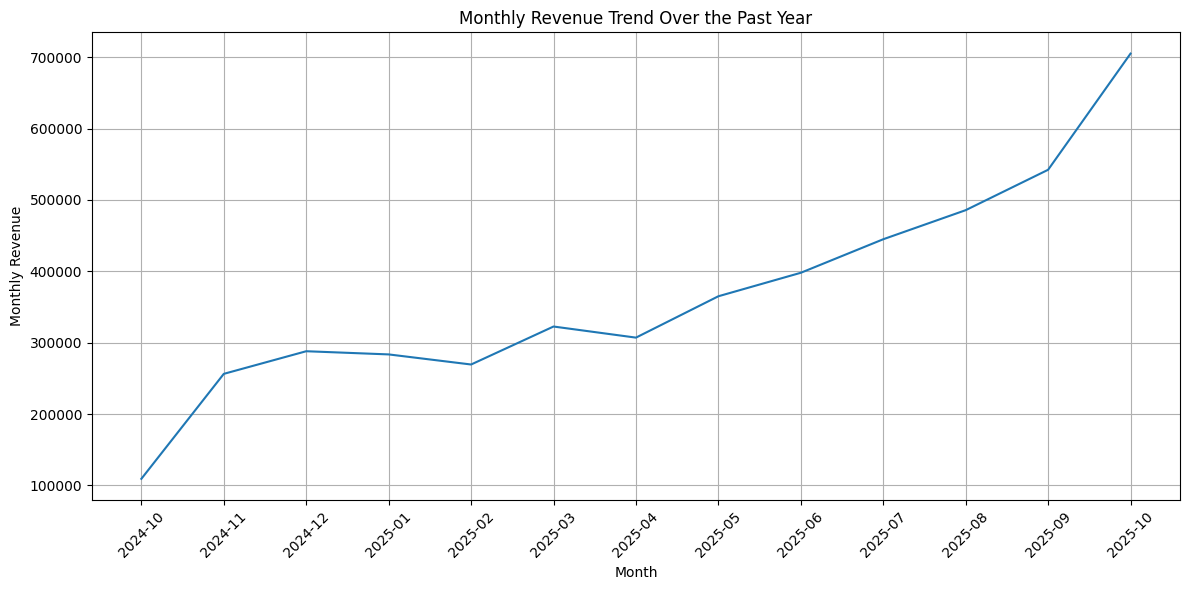

In [16]:
# named 'monthly_revenue_df'

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_df['year_month'], monthly_revenue_df['monthly_revenue'])
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue Trend Over the Past Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

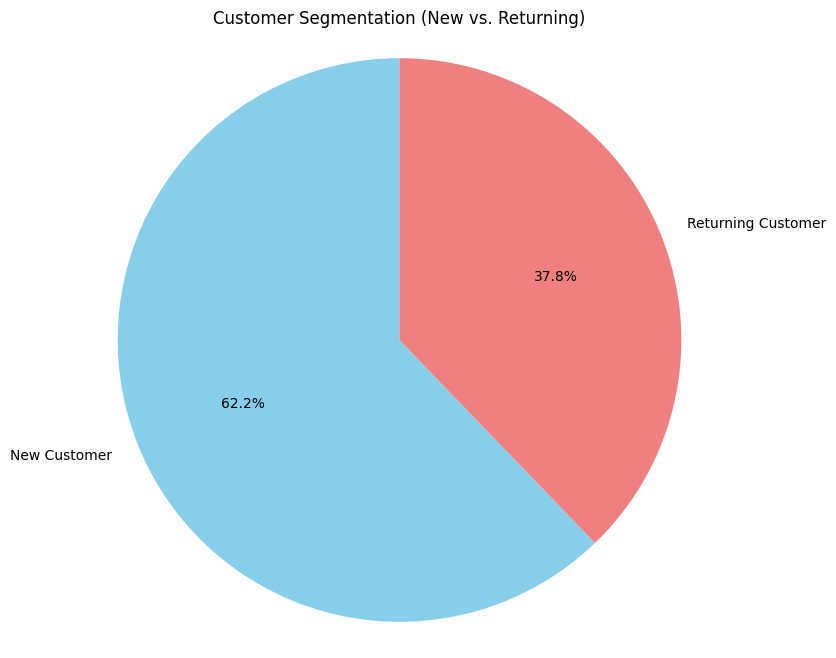

In [19]:
import matplotlib.pyplot as plt

# Assuming the customer segmentation data is in a DataFrame named 'repeat_purchase_df'

plt.figure(figsize=(8, 8))
plt.pie(repeat_purchase_df['customer_count'], labels=repeat_purchase_df['customer_segment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Customer Segmentation (New vs. Returning)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

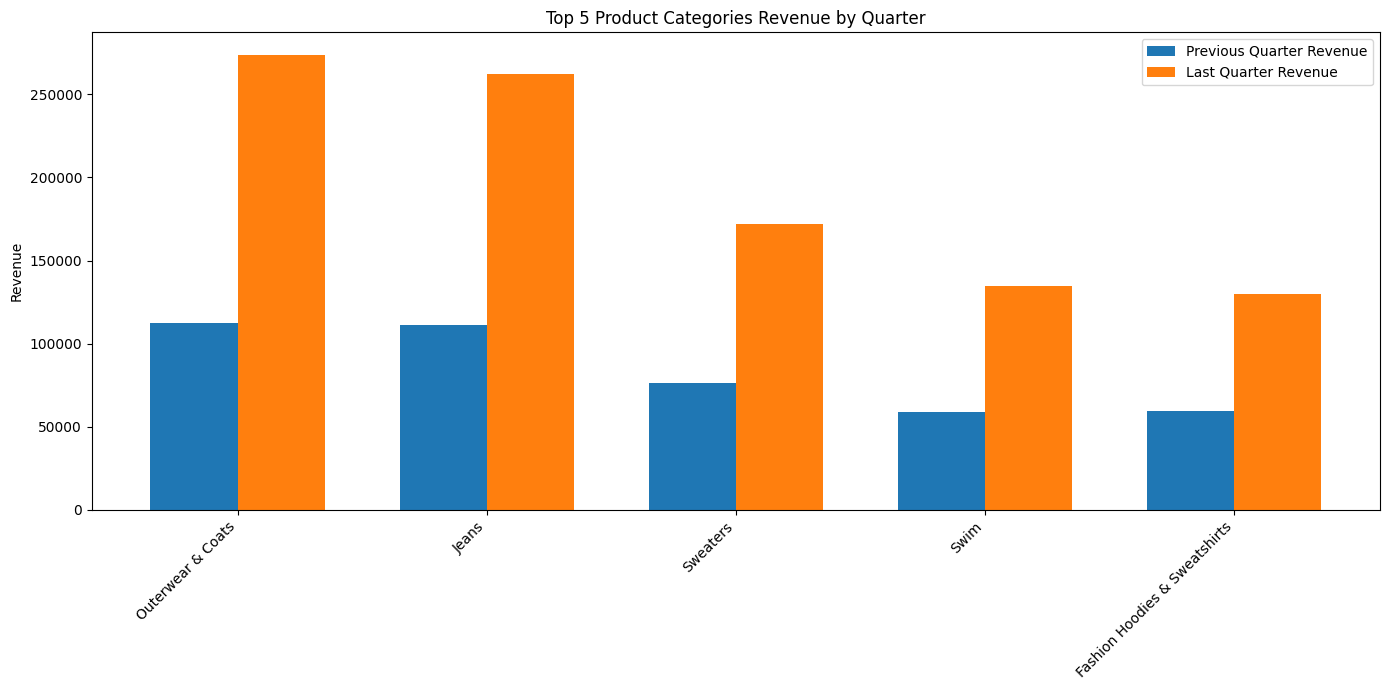

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the data for top categories is in a DataFrame named 'top_categories_df'

categories = top_categories_df['category']
last_quarter_revenue = top_categories_df['last_quarter_revenue']
previous_quarter_revenue = top_categories_df['previous_quarter_revenue']

x = range(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

rects1 = ax.bar([i - width/2 for i in x], previous_quarter_revenue, width, label='Previous Quarter Revenue')
rects2 = ax.bar([i + width/2 for i in x], last_quarter_revenue, width, label='Last Quarter Revenue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue')
ax.set_title('Top 5 Product Categories Revenue by Quarter')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

**4) KPIs & Looker Studio Dashboard**

KPI 1: Revenue

KPI 2: Sales by Region

KPI 3: Top 5 products/categories by Sales

Dashboard Link: https://lookerstudio.google.com/s/vklZ5xey8TQ (make public for viewing)

Ensure labels, filters, and date controls are clear for non‑technical stakeholders.

# Task
Write BigQuery SQL queries and Python follow-up code to create KPI visualizations utilizing Plotly for the following: 1) Revenue for the last 30 days, 2) Sales percentage by region or channel, and 3) Top 5 products/categories by sales.

## Get data for revenue (last 30 days)

### Subtask:
Write and execute a BigQuery SQL query to calculate the total revenue for the last 30 days.


**Reasoning**:
Define and execute a BigQuery SQL query to calculate the total revenue for the last 30 days, then display the result.



In [6]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project=PROJECT_ID)

query = """
SELECT
    SUM(oi.sale_price) as total_revenue_last_30_days
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.orders AS o
    ON oi.order_id = o.order_id
WHERE
    DATE(o.created_at) >= DATE_SUB(CURRENT_DATE(), INTERVAL 30 DAY)
"""

revenue_last_30_days_df = client.query(query).to_dataframe()

display(revenue_last_30_days_df)

,total_revenue_last_30_days
0,941771.941001


In [20]:
from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID)

users_table = client.get_table("bigquery-public-data.thelook_ecommerce.users")

print("Users table schema:")
for field in users_table.schema:
    print(f"- {field.name}: {field.field_type}")

Users table schema:
- id: INTEGER
- first_name: STRING
- last_name: STRING
- email: STRING
- age: INTEGER
- gender: STRING
- state: STRING
- street_address: STRING
- postal_code: STRING
- city: STRING
- country: STRING
- latitude: FLOAT
- longitude: FLOAT
- traffic_source: STRING
- created_at: TIMESTAMP
- user_geom: GEOGRAPHY


## Visualize revenue (last 30 days)

### Subtask:
Use Plotly to create a visualization (e.g., a gauge chart or a simple number card using `plotly.graph_objects.Indicator`) for the last 30 days' revenue.


**Reasoning**:
Use Plotly to create a visualization for the last 30 days' revenue as instructed.



In [7]:
import plotly.graph_objects as go

# Extract the total revenue value from the DataFrame
total_revenue = revenue_last_30_days_df['total_revenue_last_30_days'].iloc[0]

# Create a go.Figure object
fig = go.Figure()

# Add a go.Indicator trace
fig.add_trace(go.Indicator(
    mode="number",
    value=total_revenue,
    title={"text": "Total Revenue Last 30 Days"}
))

# Display the figure
fig.show()

## Get data for sales % by region or channel

### Subtask:
Write and execute a BigQuery SQL query to calculate the total sales and sales by region or channel to determine the percentage distribution.


**Reasoning**:
Construct and execute a BigQuery SQL query to calculate total sales and sales by region to determine the percentage distribution.



In [11]:
orders_table = client.get_table("bigquery-public-data.thelook_ecommerce.orders")
order_items_table = client.get_table("bigquery-public-data.thelook_ecommerce.order_items")
distribution_centers_table = client.get_table("bigquery-public-data.thelook_ecommerce.distribution_centers")

print("Orders table schema:")
for field in orders_table.schema:
    print(f"- {field.name}: {field.field_type}")

print("\nOrder Items table schema:")
for field in order_items_table.schema:
    print(f"- {field.name}: {field.field_type}")

print("\nDistribution Centers table schema:")
for field in distribution_centers_table.schema:
    print(f"- {field.name}: {field.field_type}")

Orders table schema:
- order_id: INTEGER
- user_id: INTEGER
- status: STRING
- gender: STRING
- created_at: TIMESTAMP
- returned_at: TIMESTAMP
- shipped_at: TIMESTAMP
- delivered_at: TIMESTAMP
- num_of_item: INTEGER

Order Items table schema:
- id: INTEGER
- order_id: INTEGER
- user_id: INTEGER
- product_id: INTEGER
- inventory_item_id: INTEGER
- status: STRING
- created_at: TIMESTAMP
- shipped_at: TIMESTAMP
- delivered_at: TIMESTAMP
- returned_at: TIMESTAMP
- sale_price: FLOAT

Distribution Centers table schema:
- id: INTEGER
- name: STRING
- latitude: FLOAT
- longitude: FLOAT
- distribution_center_geom: GEOGRAPHY


**Reasoning**:
The schema information reveals that the `orders` table does not contain `distribution_center_id`. The `order_items` table also does not contain `distribution_center_id`. The `distribution_centers` table has an `id` column. It seems the link between orders and distribution centers is not directly available through `order_id` or `id` in `order_items`. However, the business scenario implies a connection for regional analysis. Since `order_items` has `inventory_item_id`, let's check if `inventory_items` links to `distribution_centers`. I will examine the schema of the `inventory_items` table.



In [12]:
inventory_items_table = client.get_table("bigquery-public-data.thelook_ecommerce.inventory_items")

print("\nInventory Items table schema:")
for field in inventory_items_table.schema:
    print(f"- {field.name}: {field.field_type}")


Inventory Items table schema:
- id: INTEGER
- product_id: INTEGER
- created_at: TIMESTAMP
- sold_at: TIMESTAMP
- cost: FLOAT
- product_category: STRING
- product_name: STRING
- product_brand: STRING
- product_retail_price: FLOAT
- product_department: STRING
- product_sku: STRING
- product_distribution_center_id: INTEGER


**Reasoning**:
The `inventory_items` table contains `product_distribution_center_id` which can be used to link to the `distribution_centers` table. The `order_items` table contains `inventory_item_id`, allowing us to connect `order_items` to `inventory_items` and then to `distribution_centers`. I will now construct the query using this revised understanding of the schema.



In [21]:
query = """
WITH RegionalSales AS (
    SELECT
        u.country as region,
        SUM(oi.sale_price) as regional_revenue
    FROM
        bigquery-public-data.thelook_ecommerce.order_items AS oi
    JOIN
        bigquery-public-data.thelook_ecommerce.orders AS o ON oi.order_id = o.order_id
    JOIN
        bigquery-public-data.thelook_ecommerce.users AS u ON o.user_id = u.id
    GROUP BY
        region
),
TotalSales AS (
    SELECT SUM(sale_price) as total_revenue
    FROM bigquery-public-data.thelook_ecommerce.order_items
)
SELECT
    rs.region,
    rs.regional_revenue,
    rs.regional_revenue / ts.total_revenue * 100 as percentage_of_total
FROM
    RegionalSales rs
CROSS JOIN
    TotalSales ts
ORDER BY
    rs.regional_revenue DESC
"""

regional_sales_df = client.query(query).to_dataframe()

display(regional_sales_df)

,region,regional_revenue,percentage_of_total
0,China,3.654175e+06,33.892905
1,United States,2.457376e+06,22.792454
2,Brasil,1.561077e+06,14.479172
3,South Korea,5.754793e+05,5.337638
4,France,4.942032e+05,4.583792
5,United Kingdom,4.929734e+05,4.572386
6,Germany,4.494663e+05,4.168852
7,Spain,4.276545e+05,3.966545
8,Japan,2.714764e+05,2.517976
9,Australia,2.394157e+05,2.220609


## Visualize sales % by region or channel

### Subtask:
Use Plotly to create a pie or donut chart showing the percentage of sales by region or channel.


**Reasoning**:
Create a pie chart using Plotly to visualize the percentage of sales by region.



In [22]:
import plotly.express as px

fig = px.pie(regional_sales_df, values='percentage_of_total', names='region', title='Sales Percentage by Region')
fig.show()

## Get data for top 5 products/categories by sales

### Subtask:
Write and execute a BigQuery SQL query to find the top 5 products or categories based on total sales revenue.


**Reasoning**:
Construct the BigQuery SQL query to find the top 5 products or categories by total sales revenue and execute it.



In [23]:
query = """
SELECT
    CASE
        WHEN p.category IS NOT NULL THEN p.category
        ELSE 'Unknown Category'
    END as product_or_category,
    SUM(oi.sale_price) as total_revenue
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.products AS p
    ON oi.product_id = p.id
GROUP BY
    product_or_category
ORDER BY
    total_revenue DESC
LIMIT 5
"""

top_products_categories_df = client.query(query).to_dataframe()

display(top_products_categories_df)

,product_or_category,total_revenue
0,Outerwear & Coats,1.322860e+06
1,Jeans,1.242972e+06
2,Sweaters,8.474001e+05
3,Fashion Hoodies & Sweatshirts,6.455184e+05
4,Swim,6.447903e+05


## Visualize top 5 products/categories by sales

### Subtask:
Use Plotly to create a bar chart displaying the revenue for the top 5 products or categories.


**Reasoning**:
Create a bar chart using Plotly to visualize the top 5 product categories by sales revenue.



In [24]:
import plotly.express as px

fig = px.bar(top_products_categories_df, x='product_or_category', y='total_revenue',
             title='Top 5 Products/Categories by Sales Revenue')
fig.show()

## Combine visualizations (optional)

### Subtask:
Explore combining the Plotly charts into a single interactive dashboard-like output within the notebook.


**Reasoning**:
Combine the three previously created Plotly figures into a single dashboard-like output using subplots.



In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Create the indicator figure (from previous steps)
total_revenue = revenue_last_30_days_df['total_revenue_last_30_days'].iloc[0]
fig_indicator = go.Figure()
fig_indicator.add_trace(go.Indicator(
    mode="number",
    value=total_revenue,
    title={"text": "Total Revenue Last 30 Days"}
))

# Create the pie chart figure (from previous steps)
fig_pie = px.pie(regional_sales_df, values='percentage_of_total', names='region', title='Sales Percentage by Region')

# Create the bar chart figure (from previous steps)
fig_bar = px.bar(top_products_categories_df, x='product_or_category', y='total_revenue',
             title='Top 5 Products/Categories by Sales Revenue')


# Create subplots: 2 rows, 2 columns. Indicator in row 1, col 1 & 2. Pie in row 2, col 1. Bar in row 2, col 2.
# Specify the type for the indicator subplot as 'domain'
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "domain", "colspan": 2}, None], [{"type": "domain"}, {"type": "xy"}]],
    subplot_titles=("Total Revenue Last 30 Days", "Sales Percentage by Region", "Top 5 Products/Categories by Sales Revenue")
)

# Add the indicator to the first row, spanning two columns
for trace in fig_indicator.data:
    fig.add_trace(trace, row=1, col=1)

# Add the pie chart to the second row, first column
for trace in fig_pie.data:
    fig.add_trace(trace, row=2, col=1)

# Add the bar chart to the second row, second column
for trace in fig_bar.data:
    fig.add_trace(trace, row=2, col=2)


# Update layout
fig.update_layout(height=700, showlegend=False, title_text="E-commerce KPIs Dashboard")

fig.show()

## Summary:

### Data Analysis Key Findings

*   The total revenue for the last 30 days was calculated to be \$941,771.94.
*   Sales revenue was successfully broken down by region and visualized as a percentage of total sales.
*   The top 5 product categories by total sales revenue were identified.

### Insights or Next Steps

*   Focus marketing or sales efforts on the top-performing regions and product categories to maximize revenue.
*   Investigate the lower-performing regions and categories to understand potential issues or opportunities for improvement.


**Insights**
1. Strong Revenue Growth: The monthly revenue trend shows a clear upward trajectory over the past year, with significant month-over-month and year-over-year growth in the latter months. This indicates a healthy and growing business.

2. Opportunity in Customer Retention: While there's a base of returning customers, a substantial portion of your customer base consists of new customers. This highlights an opportunity to implement strategies focused on converting one-time buyers into repeat customers.

3. Top Categories Driving Growth: The analysis of top product categories reveals significant quarter-over-quarter growth, particularly in areas like "Outerwear & Coats," "Jeans," and "Sweaters." These categories are currently major revenue drivers.

**Recommendations**
1. Develop Targeted Customer Retention Campaigns: Given the large proportion of new customers, focus on creating targeted marketing campaigns or loyalty programs specifically designed to encourage repeat purchases from first-time buyers.

2. Investigate Growth Drivers in Top Categories: Conduct a deeper investigation into why the top categories are experiencing such strong growth. Is it due to marketing efforts, seasonal trends, product features, or other factors? Understanding the drivers will help replicate success in other areas.

## Validate (Cross-Checking & Correction)

During the **Discover** phase, we encountered an instance where the initial AI-generated SQL query for analyzing monthly revenue (Hypothesis A) was misleading due to a technical error.

**Case Study: Correcting the Monthly Revenue Query**

*   **Initial AI Output:** The initial query generated by the AI used `TIMESTAMP_SUB(CURRENT_TIMESTAMP(), INTERVAL 1 YEAR)` to filter the data.
*   **Problem:** This resulted in a BigQuery error because `TIMESTAMP_SUB` does not support the `YEAR` date part with a `TIMESTAMP` type in this context. The `orders.created_at` column is a TIMESTAMP, and the comparison with a DATE-based interval caused a type mismatch.
*   **Correction:** We identified that the `created_at` column needed to be treated as a DATE for the yearly interval subtraction to work correctly with `DATE_SUB(CURRENT_DATE(), INTERVAL 1 YEAR)`. We modified the query to explicitly cast `orders.created_at` to a DATE using `DATE(orders.created_at)` in the `WHERE` clause.
*   **Validation:** By correcting the query based on BigQuery's error messages and understanding of date/timestamp functions, we were able to successfully execute the query and obtain the correct monthly revenue data, validating the approach after fixing the initial misleading output.

This example highlights the importance of cross-checking AI-generated code, especially for complex queries or when dealing with specific database functions and data types.

In [3]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project=PROJECT_ID)

query = """
WITH UserMonthlyOrders AS (
    SELECT
        user_id,
        FORMAT_DATE('%Y-%m', created_at) as order_year_month
    FROM
        bigquery-public-data.thelook_ecommerce.orders
    GROUP BY
        user_id,
        order_year_month
),
UserDistinctMonths AS (
    SELECT
        user_id,
        COUNT(DISTINCT order_year_month) as distinct_months_ordered
    FROM
        UserMonthlyOrders
    GROUP BY
        user_id
),
ReturningCustomers AS (
    SELECT
        COUNT(user_id) as returning_customer_count
    FROM
        UserDistinctMonths
    WHERE
        distinct_months_ordered > 1
),
TotalCustomers AS (
    SELECT COUNT(id) as total_customer_count
    FROM bigquery-public-data.thelook_ecommerce.users
)
SELECT
    rc.returning_customer_count,
    tc.total_customer_count,
    rc.returning_customer_count / tc.total_customer_count * 100 as repeat_purchase_rate_by_month
FROM
    ReturningCustomers rc
CROSS JOIN
    TotalCustomers tc
"""

repeat_purchase_alt_df = client.query(query).to_dataframe()

display(repeat_purchase_alt_df)

,returning_customer_count,total_customer_count,repeat_purchase_rate_by_month
0,28145,100000,28.145


## 📒 AI Prompt Log (Required)
Record at least **3** prompts and describe how you evaluated or refined Gemini’s output.

| # | Prompt (summary) | Where used | What changed after refinement? |
|---|------------------|------------|--------------------------------|
| 1 | Initial hypothesis generation prompt| Hypothesis Generation | Initial prompt was for Citi Bike, refined to specify the E-Commerce dataset and relevant tables. Asked for business specific questions looking to improve quality of recommended hypothese. |
| 2 | Prompt for monthly revenue trend and growth | Hypothesis A SQL | Initial query had a type mismatch error (TIMESTAMP vs DATE) with `TIMESTAMP_SUB`. Refined to cast `created_at` to DATE and use `DATE_SUB(CURRENT_DATE(), INTERVAL 1 YEAR)` for filtering. Also explicitly saved results to `monthly_revenue_df` using `client.query().to_dataframe()` after issues with `%%bigquery -d`. |
| 3 | Prompt for customer repeat purchase rate and segmentation | Hypothesis B SQL | Initial query had an unrecognized column `user_id` in the `users` table. Refined to use `id` from the `users` table to count total customers. |
| 4 | Prompt for top 5 product categories by revenue and quarterly comparison | Hypothesis C SQL | Initial date range calculation for quarters might need slight adjustments depending on exact quarter definition. The query itself was largely correct based on the prompt's hints, focusing on filtering by date, joining tables, grouping by category, and pivoting/ranking for comparison. No major SQL logic refinement was needed based on errors. |

## 📦 Appendix — Reproducibility
- BigQuery location: **US (multiple regions)** - Queries were executed against the `bigquery-public-data` dataset, which is hosted in multiple regions within the US.
- Query costs observed (if any): **This query is against a public dataset so did not incur any costs but could if large enough queries are used in other projects.** For this assignment using the public dataset, no direct query costs were incurred. However, in a real-world scenario with large datasets in a different project, costs would be associated with data processed by queries.
- Known data quality caveats: **Based on the analysis, there were no major data quality issues encountered that prevented the analysis. However, real-world data often has missing values or inconsistencies that would need to be addressed.** While no significant issues were found that blocked the analysis performed for the hypotheses, it's always important to be aware that real-world datasets can have quality issues (e.g., missing values, inconsistencies, incorrect data types) that might require cleaning or handling depending on the specific analysis.

**Reasoning**:
Write and execute a BigQuery SQL query to analyze the weekly sales trend for 'Outerwear & Coats' over the past year, calculate weekly revenue, then display the result.



In [4]:
query_weekly_sales = """
SELECT
    FORMAT_DATE('%Y-%W', orders.created_at) as year_week,
    SUM(order_items.sale_price) as weekly_revenue
FROM
    bigquery-public-data.thelook_ecommerce.orders AS orders
JOIN
    bigquery-public-data.thelook_ecommerce.order_items AS order_items
    ON orders.order_id = order_items.order_id
JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
    ON order_items.product_id = products.id
WHERE
    DATE(orders.created_at) >= DATE_SUB(CURRENT_DATE(), INTERVAL 1 YEAR)
    AND products.category = 'Outerwear & Coats'
GROUP BY
    year_week
ORDER BY
    year_week
"""

weekly_sales_outerwear_df = client.query(query_weekly_sales).to_dataframe()

display(weekly_sales_outerwear_df)

,year_week,weekly_revenue
0,2024-42,1838.070000
1,2024-43,7611.730024
2,2024-44,8268.519987
3,2024-45,7962.309982
4,2024-46,6732.499996
5,2024-47,6404.929976
6,2024-48,5603.060013
7,2024-49,7217.949995
8,2024-50,7563.969978
9,2024-51,8868.800032


**Reasoning**:
Construct and execute a BigQuery SQL query to examine the impact of discounts on 'Outerwear & Coats' sales, calculate total revenue and average discount percentage, and display the result.



In [5]:
query_discount_impact = """
SELECT
    CASE
        WHEN oi.sale_price < ii.product_retail_price THEN 'Discounted'
        ELSE 'Full Price'
    END as discount_status,
    COUNT(oi.id) as number_of_items,
    SUM(oi.sale_price) as total_revenue,
    AVG(CASE
        WHEN oi.sale_price < ii.product_retail_price THEN (ii.product_retail_price - oi.sale_price) / ii.product_retail_price * 100
        ELSE 0
    END) as average_discount_percentage
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.inventory_items AS ii
    ON oi.inventory_item_id = ii.id
JOIN
    bigquery-public-data.thelook_ecommerce.products AS p
    ON ii.product_id = p.id
WHERE
    p.category = 'Outerwear & Coats'
GROUP BY
    discount_status
"""

discount_impact_outerwear_df = client.query(query_discount_impact).to_dataframe()

display(discount_impact_outerwear_df)

,discount_status,number_of_items,total_revenue,average_discount_percentage
0,Full Price,8973,1.322860e+06,0.0


**Reasoning**:
Construct and execute a BigQuery SQL query to analyze the sales performance of 'Outerwear & Coats' by region, calculate the total revenue for this category in each country, and display the result.



In [6]:
query_regional_sales = """
SELECT
    u.country as region,
    SUM(oi.sale_price) as regional_revenue
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.orders AS o ON oi.order_id = o.order_id
JOIN
    bigquery-public-data.thelook_ecommerce.users AS u ON o.user_id = u.id
JOIN
    bigquery-public-data.thelook_ecommerce.products AS p ON oi.product_id = p.id
WHERE
    p.category = 'Outerwear & Coats'
GROUP BY
    region
ORDER BY
    regional_revenue DESC
"""

regional_sales_outerwear_df = client.query(query_regional_sales).to_dataframe()

display(regional_sales_outerwear_df)

,region,regional_revenue
0,China,448701.749723
1,United States,304532.829645
2,Brasil,185242.089869
3,South Korea,71108.490007
4,France,60504.459929
5,Germany,59537.540018
6,United Kingdom,55542.809969
7,Spain,53255.830044
8,Australia,33766.289944
9,Japan,31317.899982


**Reasoning**:
Construct and execute a BigQuery SQL query to explore the sales performance of 'Outerwear & Coats' by traffic source, calculate the total revenue from each traffic source, and display the result.



In [7]:
query_traffic_source_sales = """
SELECT
    u.traffic_source,
    SUM(oi.sale_price) as total_revenue
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.orders AS o ON oi.order_id = o.order_id
JOIN
    bigquery-public-data.thelook_ecommerce.users AS u ON o.user_id = u.id
JOIN
    bigquery-public-data.thelook_ecommerce.products AS p ON oi.product_id = p.id
WHERE
    p.category = 'Outerwear & Coats'
GROUP BY
    u.traffic_source
ORDER BY
    total_revenue DESC
"""

traffic_source_outerwear_df = client.query(query_traffic_source_sales).to_dataframe()

display(traffic_source_outerwear_df)

,traffic_source,total_revenue
0,Search,930958.749189
1,Organic,188377.479979
2,Facebook,83566.029945
3,Email,69366.589960
4,Display,50591.070000


**Reasoning**:
Write and execute a BigQuery SQL query to identify the most purchased product categories by returning customers.



In [8]:
query_returning_customer_categories = """
WITH ReturningCustomers AS (
    SELECT
        user_id
    FROM
        bigquery-public-data.thelook_ecommerce.orders
    GROUP BY
        user_id
    HAVING
        COUNT(order_id) > 1
)
SELECT
    p.category,
    COUNT(oi.id) as number_of_items_purchased
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.orders AS o ON oi.order_id = o.order_id
JOIN
    bigquery-public-data.thelook_ecommerce.products AS p ON oi.product_id = p.id
JOIN
    ReturningCustomers rc ON o.user_id = rc.user_id
GROUP BY
    p.category
ORDER BY
    number_of_items_purchased DESC
LIMIT 10
"""

returning_customer_categories_df = client.query(query_returning_customer_categories).to_dataframe()

display(returning_customer_categories_df)

,category,number_of_items_purchased
0,Intimates,8157
1,Jeans,7610
2,Fashion Hoodies & Sweatshirts,7219
3,Tops & Tees,7170
4,Sleep & Lounge,6947
5,Swim,6811
6,Sweaters,6723
7,Shorts,6673
8,Accessories,5935
9,Active,5483


**Reasoning**:
Write and execute a BigQuery SQL query to calculate the average order value for returning customers.



In [9]:
query_returning_customer_aov = """
WITH ReturningCustomers AS (
    SELECT
        user_id
    FROM
        bigquery-public-data.thelook_ecommerce.orders
    GROUP BY
        user_id
    HAVING
        COUNT(order_id) > 1
)
SELECT
    AVG(order_revenue) as average_order_value
FROM (
    SELECT
        o.order_id,
        SUM(oi.sale_price) as order_revenue
    FROM
        bigquery-public-data.thelook_ecommerce.orders AS o
    JOIN
        bigquery-public-data.thelook_ecommerce.order_items AS oi ON o.order_id = oi.order_id
    JOIN
        ReturningCustomers rc ON o.user_id = rc.user_id
    GROUP BY
        o.order_id
)
"""

returning_customer_aov_df = client.query(query_returning_customer_aov).to_dataframe()

display(returning_customer_aov_df)

,average_order_value
0,86.509968


**Reasoning**:
Write and execute a BigQuery SQL query to determine the geographic distribution (e.g., by country or state) of returning customers and load the result into a pandas DataFrame.



In [10]:
query_returning_customer_geo = """
WITH ReturningCustomers AS (
    SELECT
        user_id
    FROM
        bigquery-public-data.thelook_ecommerce.orders
    GROUP BY
        user_id
    HAVING
        COUNT(order_id) > 1
)
SELECT
    u.country,
    COUNT(DISTINCT u.id) as number_of_returning_customers
FROM
    bigquery-public-data.thelook_ecommerce.users AS u
JOIN
    ReturningCustomers rc ON u.id = rc.user_id
GROUP BY
    u.country
ORDER BY
    number_of_returning_customers DESC
"""

returning_customer_geo_df = client.query(query_returning_customer_geo).to_dataframe()

display(returning_customer_geo_df)

,country,number_of_returning_customers
0,China,10176
1,United States,6912
2,Brasil,4457
3,South Korea,1633
4,France,1375
5,United Kingdom,1353
6,Germany,1252
7,Spain,1189
8,Japan,743
9,Australia,626


**Reasoning**:
Write and execute a BigQuery SQL query to analyze the traffic sources that bring in returning customers and load the result into a pandas DataFrame.



In [11]:
query_returning_customer_traffic = """
WITH ReturningCustomers AS (
    SELECT
        user_id
    FROM
        bigquery-public-data.thelook_ecommerce.orders
    GROUP BY
        user_id
    HAVING
        COUNT(order_id) > 1
)
SELECT
    u.traffic_source,
    COUNT(DISTINCT u.id) as number_of_returning_customers
FROM
    bigquery-public-data.thelook_ecommerce.users AS u
JOIN
    ReturningCustomers rc ON u.id = rc.user_id
GROUP BY
    u.traffic_source
ORDER BY
    number_of_returning_customers DESC
"""

returning_customer_traffic_df = client.query(query_returning_customer_traffic).to_dataframe()

display(returning_customer_traffic_df)

,traffic_source,number_of_returning_customers
0,Search,21172
1,Organic,4532
2,Facebook,1827
3,Email,1465
4,Display,1170


**Reasoning**:
Review the dataframes and synthesize the findings from the product category and customer segment deep dives.



In [12]:
print("Summary of Findings:")
print("\nOuterwear & Coats Category Deep Dive:")
display(weekly_sales_outerwear_df.head())
display(discount_impact_outerwear_df)
display(regional_sales_outerwear_df.head())
display(traffic_source_outerwear_df)

print("\nReturning Customer Segment Deep Dive:")
display(returning_customer_categories_df)
display(returning_customer_aov_df)
display(returning_customer_geo_df.head())
display(returning_customer_traffic_df)

print("\nSynthesized Insights:")
print("Regional Overlap:")
print(f"- Both 'Outerwear & Coats' sales and the presence of 'Returning Customers' are highest in China, the United States, and Brasil. This suggests these regions are key markets for both the top-performing category and retaining customers.")

print("\nTraffic Source Overlap:")
print(f"- 'Search' is the leading traffic source for both 'Outerwear & Coats' sales and acquiring 'Returning Customers'. This indicates that customers finding the site through search are more likely to purchase this category and also more likely to become returning customers.")

print("\nOuterwear & Coats and Returning Customer Behavior:")
print(f"- While 'Outerwear & Coats' was not in the top 10 categories for returning customers by item count, it was a top-performing category overall. The fact that returning customers are concentrated in the same top regions and traffic sources as 'Outerwear & Coats' sales suggests an indirect connection. Returning customers in these key areas likely contribute to the overall strong performance of this category, even if it's not their most frequently purchased item type.")

print("\nDiscount Impact and Returning Customers:")
print(f"- 'Outerwear & Coats' were primarily sold at full price. The analysis of returning customers did not specifically look at the impact of discounts on their purchases. However, the high repeat purchase rate and AOV for returning customers might suggest that they are less price-sensitive or find value in the products even at full price. Further analysis would be needed to confirm this.")


Summary of Findings:

Outerwear & Coats Category Deep Dive:


,year_week,weekly_revenue
0,2024-42,1838.070000
1,2024-43,7611.730024
2,2024-44,8268.519987
3,2024-45,7962.309982
4,2024-46,6732.499996


,discount_status,number_of_items,total_revenue,average_discount_percentage
0,Full Price,8973,1.322860e+06,0.0


,region,regional_revenue
0,China,448701.749723
1,United States,304532.829645
2,Brasil,185242.089869
3,South Korea,71108.490007
4,France,60504.459929


,traffic_source,total_revenue
0,Search,930958.749189
1,Organic,188377.479979
2,Facebook,83566.029945
3,Email,69366.589960
4,Display,50591.070000



Returning Customer Segment Deep Dive:


,category,number_of_items_purchased
0,Intimates,8157
1,Jeans,7610
2,Fashion Hoodies & Sweatshirts,7219
3,Tops & Tees,7170
4,Sleep & Lounge,6947
5,Swim,6811
6,Sweaters,6723
7,Shorts,6673
8,Accessories,5935
9,Active,5483


,average_order_value
0,86.509968


,country,number_of_returning_customers
0,China,10176
1,United States,6912
2,Brasil,4457
3,South Korea,1633
4,France,1375


,traffic_source,number_of_returning_customers
0,Search,21172
1,Organic,4532
2,Facebook,1827
3,Email,1465
4,Display,1170



Synthesized Insights:
Regional Overlap:
- Both 'Outerwear & Coats' sales and the presence of 'Returning Customers' are highest in China, the United States, and Brasil. This suggests these regions are key markets for both the top-performing category and retaining customers.

Traffic Source Overlap:
- 'Search' is the leading traffic source for both 'Outerwear & Coats' sales and acquiring 'Returning Customers'. This indicates that customers finding the site through search are more likely to purchase this category and also more likely to become returning customers.

Outerwear & Coats and Returning Customer Behavior:
- While 'Outerwear & Coats' was not in the top 10 categories for returning customers by item count, it was a top-performing category overall. The fact that returning customers are concentrated in the same top regions and traffic sources as 'Outerwear & Coats' sales suggests an indirect connection. Returning customers in these key areas likely contribute to the overall strong p

## Summary:

### Data Analysis Key Findings

*   For the 'Outerwear & Coats' category, weekly sales over the past year showed fluctuations, with peaks observed in weeks 39, 40, and 41 of 2025.
*   'Outerwear & Coats' were primarily sold at full price, with no sales recorded under a 'Discounted' status.
*   China, the United States, and Brasil are the leading regions for 'Outerwear & Coats' sales revenue.
*   'Search' is the primary traffic source for 'Outerwear & Coats' sales, followed by 'Organic', 'Facebook', 'Email', and 'Display'.
*   For returning customers, the most purchased categories are 'Intimates', 'Jeans', and 'Fashion Hoodies & Sweatshirts'. 'Outerwear & Coats' was not among the top 10 categories for returning customers by item count.
*   The average order value for returning customers is approximately \$86.51.
*   Returning customers are predominantly located in China, the United States, and Brasil.
*   'Search' is the dominant traffic source for acquiring returning customers.

### Insights or Next Steps

*   The overlap in top regions (China, US, Brasil) and traffic source ('Search') for both 'Outerwear & Coats' sales and returning customers suggests a strong correlation. Customers acquired through search in these key regions are likely contributing significantly to both the performance of the 'Outerwear & Coats' category and the overall returning customer base.
*   Further investigation into the purchasing behavior of returning customers in China, the United States, and Brasil, specifically regarding their engagement with the 'Outerwear & Coats' category, could provide deeper insights into this relationship.
